<a href="https://colab.research.google.com/github/VysePresident/Alzheimers_Disease_MRI_Classification/blob/main/Alzheimer's_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import numpy as np
from PIL import Image
import os

import matplotlib.pyplot as plt
import sklearn

print(tf.__version__)
print(np.version.version)
print(pd.__version__)



2.9.2
1.21.6
1.3.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# TEST UNZIP

# !unzip alzheimers_archive.zip

In [ ]:
def load_individual_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img, dtype="int32") #.flatten()
    return data

In [ ]:
def handleImages(nestedFileName):
  allImages = []
  for file in os.listdir(nestedFileName):
    allImages.append(load_individual_image(nestedFileName + file))
  return np.asarray(allImages)

In [ ]:
# TOP SET PULLS FROM GOOGLE DRIVE.  BOTTOM SET FROM UPLOADED ZIP

MildDemImageArr = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/MildDemented/") / 255
ModDemImageArr = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/ModerateDemented/") / 255
NonDemImageArr = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/NonDemented/") / 255
VeryDemImageArr = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/VeryMildDemented/") / 255

testarrone = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/MildDemented/") / 255
testarrtwo = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/ModerateDemented/") / 255
testarrthree = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/NonDemented/") / 255
testarrfour = handleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/VeryMildDemented/") / 255

# MildDemImageArr = handleImages("/content/Alzheimer_s Dataset/train/MildDemented/") / 255
# ModDemImageArr = handleImages("/content/Alzheimer_s Dataset/train/ModerateDemented/") / 255
# NonDemImageArr = handleImages("/content/Alzheimer_s Dataset/train/NonDemented/") / 255
# VeryDemImageArr = handleImages("/content/Alzheimer_s Dataset/train/VeryMildDemented/") / 255

# testarrone = handleImages("/content/Alzheimer_s Dataset/test/MildDemented/") / 255
# testarrtwo = handleImages("/content/Alzheimer_s Dataset/test/ModerateDemented/") / 255
# testarrthree = handleImages("/content/Alzheimer_s Dataset/test/NonDemented/") / 255
# testarrfour = handleImages("/content/Alzheimer_s Dataset/test/VeryMildDemented/") / 255

In [ ]:
mildDX = np.concatenate((MildDemImageArr, testarrone), dtype=np.floating)
mildDY = np.ones(mildDX.shape[0])

modDX = np.concatenate((ModDemImageArr, testarrtwo), dtype=np.floating)
modDY = np.ones(modDX.shape[0])*2

noDX = np.concatenate((NonDemImageArr, testarrthree), dtype=np.floating)
noDY = np.ones(noDX.shape[0])*3

vDX = np.concatenate((VeryDemImageArr, testarrfour), dtype=np.floating)
vDY = np.ones(vDX.shape[0])*4

In [ ]:
Xtotal = np.concatenate((mildDX, modDX, noDX, vDX), dtype=np.floating)
Ytotal = np.concatenate((mildDY, modDY, noDY, vDY), dtype=np.floating)

In [ ]:
print(Xtotal.shape)
print(Ytotal.shape)
print(Xtotal[2400])
print(Ytotal[2400])

(6400, 208, 176)
(6400,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3.0


SVM Model

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xtotal, Ytotal, test_size=0.3)

In [ ]:
classifier = svm.SVC(C=10, gamma=0.001)

In [ ]:
classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [ ]:
classifier_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

#print('Model accuracy score with criterion rbf, C=1.0, g=0.001: {0:0.4f}'.format(accuracy_score(y_test, classifier_pred)))
print('Model accuracy score with criterion rbf, C=10.0, g=0.001: {0:0.4f}'.format(accuracy_score(y_test, classifier_pred)))

Model accuracy score with criterion rbf, C=10.0, g=0.001: 0.9875


In [ ]:
print("Classification report for classifier %s: \n%s\n"
     % (classifier, metrics.classification_report(y_test, classifier_pred)))
print("Confusion matrix: \n%s" % metrics.confusion_matrix(y_test, classifier_pred))

conf_svm = metrics.confusion_matrix(y_test, classifier_pred)

Classification report for classifier SVC(C=10, gamma=0.001): 
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       273
         2.0       1.00      0.86      0.93        29
         3.0       0.99      0.99      0.99       982
         4.0       0.98      0.99      0.98       636

    accuracy                           0.99      1920
   macro avg       0.99      0.96      0.97      1920
weighted avg       0.99      0.99      0.99      1920


Confusion matrix: 
[[267   0   2   4]
 [  0  25   2   2]
 [  0   0 975   7]
 [  0   0   7 629]]


In [ ]:
labels = []

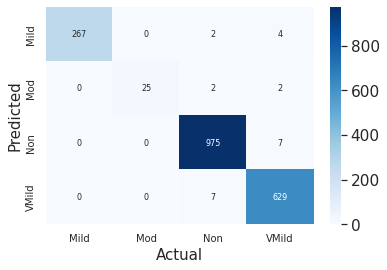

In [ ]:
# fig = plt.figure()
ax = sn.heatmap(conf_svm, annot=True,  fmt="d", cmap="Blues", xticklabels=(["Mild", "Mod", "Non", "VMild"]), yticklabels=["Mild", "Mod", "Non", "VMild"],
           annot_kws={"size": 8}) # font size
ax.set_xlabel('Actual', fontsize = 15)
ax.set_ylabel('Predicted', fontsize = 15)
ax.set_xticklabels(["Mild", "Mod", "Non", "VMild"], size = 10)
ax.set_yticklabels(["Mild", "Mod", "Non", "VMild"], size = 10)

# sn.heatmap(conf_svm, annot=True,  fmt="d", cmap="Blues", xticklabels=["Mild", "Mod", "Non", "VMild"], yticklabels=["Mild", "Mod", "Non", "VMild"],
#           annot_kws={"size": 16}) # font size
plt.show()

In [ ]:
sklearn.metrics.ConfusionMatrixDisplay(conf_svm)

In [ ]:
 disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_svm,
...                               display_labels=classifier.classes_)

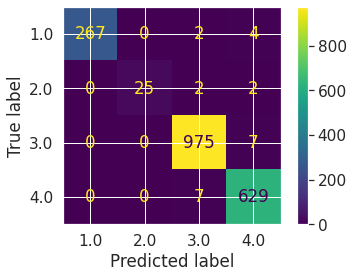

In [ ]:
disp.plot()

plt.show()

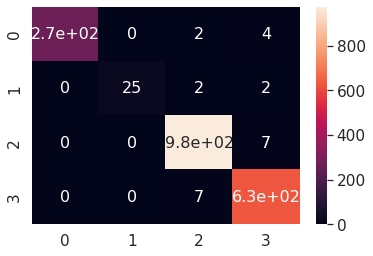

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[267,0,2,4],
         [0,25,2,2],
         [0,0,975,7],
         [0,0,7,629]]

df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
# Compare training set data results to testing set data results:

classifier_pred_train = classifier.predict(X_train)
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9927


In [ ]:
# TESTING HYPERPARAMTER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
import random

# HYPERPARAMETER TUNING

In [ ]:
# For reference

#def handleImages(nestedFileName):
#  allImages = []
#  for file in os.listdir(nestedFileName):
#    allImages.append(load_individual_image(nestedFileName + file))
#  return np.asarray(allImages)

In [ ]:
import random

In [ ]:
# For random image subset

def randomhandleImages(nestedFileName, num_samples):
  allImages = []
  for x in range(num_samples):
    file = random.choice(os.listdir(nestedFileName)) # Added
    #image_path= os.path.join(nestedFileName, file) # Swapped out img_folder with test_folder
    #img=mpimg.imread(image_path)
    allImages.append(load_individual_image(nestedFileName + file))
    # allImages.append(rand_show_individual_image(nestedFileName + file))
  return np.asarray(allImages)

In [ ]:
# For random image subset

def rand_show_individual_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img, dtype="int32") #.flatten()
    return data

In [ ]:
# for i in range(5):
#    file = random.choice(os.listdir(test_folder)) # Replace img_folder with test_folder? # SUCCESS
#    image_path= os.path.join(test_folder, file) # Swapped out img_folder with test_folder
#    img=mpimg.imread(image_path)
#    ax=plt.subplot(1,5,i+1)
#    ax.title.set_text(file)
#    plt.imshow(img)

rand_MildDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/MildDemented/", 100) / 255
rand_ModDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/ModerateDemented/", 20) / 255
rand_NonDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/NonDemented/", 128) / 255
rand_VeryDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/VeryMildDemented/", 89) / 255

rand_testarrone = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/MildDemented/", 100) / 255
rand_testarrtwo = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/ModerateDemented/", 20) / 255
rand_testarrthree = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/NonDemented/", 128) / 255
rand_testarrfour = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/VeryMildDemented/", 89) / 255

NameError: ignored

In [ ]:
# Random test to see if the images are being imported correctly.  It seems ok?

img_MildDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/MildDemented/", 5)
img_ModDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/ModerateDemented/", 5)
img_NonDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/NonDemented/", 5)
img_VeryDemImageArr = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/train/VeryMildDemented/", 5)

img_testarrone = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/MildDemented/", 5)
img_testarrtwo = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/ModerateDemented/", 5)
img_testarrthree = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/NonDemented/", 5)
img_testarrfour = randomhandleImages("/content/drive/MyDrive/Alzheimer_s Dataset/test/VeryMildDemented/", 5)

In [ ]:
# import matplotlib.image as mpimg

In [ ]:
rand_mildDX = np.concatenate((rand_MildDemImageArr, rand_testarrone), dtype=np.floating)
rand_mildDY = np.ones(rand_mildDX.shape[0])

rand_modDX = np.concatenate((rand_ModDemImageArr, rand_testarrtwo), dtype=np.floating)
rand_modDY = np.ones(rand_modDX.shape[0])*2

rand_noDX = np.concatenate((rand_NonDemImageArr, rand_testarrthree), dtype=np.floating)
rand_noDY = np.ones(rand_noDX.shape[0])*3

rand_vDX = np.concatenate((rand_VeryDemImageArr, rand_testarrfour), dtype=np.floating)
rand_vDY = np.ones(rand_vDX.shape[0])*4

In [ ]:
rand_Xtotal = np.concatenate((rand_mildDX, rand_modDX, rand_noDX, rand_vDX), dtype=np.floating)
rand_Ytotal = np.concatenate((rand_mildDY, rand_modDY, rand_noDY, rand_vDY), dtype=np.floating)

In [ ]:
print(rand_Xtotal.shape)
print(rand_Ytotal.shape)
print(rand_Xtotal[5])
print(rand_Ytotal[5])

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
rand_X_train, rand_X_test, rand_y_train, rand_y_test = train_test_split(rand_Xtotal, rand_Ytotal, test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(rand_X_train, rand_y_train)

In [ ]:
# HYPERPARAMETER BIGGER

In [ ]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(rand_X_train)
  
# print classification report
print(metrics.classification_report(rand_y_test, grid_predictions))

# SVM with new hyperparameters

In [ ]:
hyper_classifier = svm.SVC(C=10, gamma=0.001, kernel='rbf')

NameError: ignored

In [ ]:
hyper_classifier.fit(X_train, y_train)

In [ ]:
hyper_classifier = hyper_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Model accuracy score with criterion rbf, C=1.0, g=0.001: {0:0.4f}'.format(accuracy_score(y_test, hyper_classifier)))